In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("mlr_economic_data.csv")
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price_Change
0,2006,1,5.52,11.88,781.24
1,2019,11,2.98,9.95,801.72
2,2014,11,5.96,4.79,1045.76
3,2010,10,2.28,3.05,915.52
4,2007,12,9.27,10.34,996.27


In [8]:
df=df.drop(columns=["Year","Month"],axis=1)

In [9]:
df.head()

,Interest_Rate,Unemployment_Rate,Index_Price_Change
0,5.52,11.88,781.24
1,2.98,9.95,801.72
2,5.96,4.79,1045.76
3,2.28,3.05,915.52
4,9.27,10.34,996.27


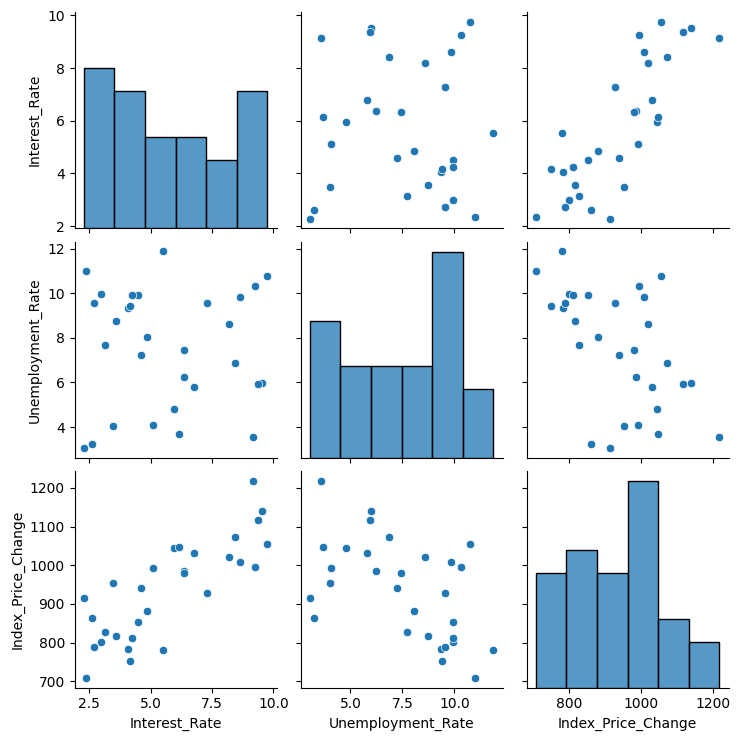

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
df.corr()

,Interest_Rate,Unemployment_Rate,Index_Price_Change
Interest_Rate,1.000000,0.007024,0.813901
Unemployment_Rate,0.007024,1.000000,-0.535403
Index_Price_Change,0.813901,-0.535403,1.000000


In [14]:
X=df[['Interest_Rate','Unemployment_Rate']]
y=df['Index_Price_Change']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


<Axes: xlabel='Interest_Rate', ylabel='Index_Price_Change'>

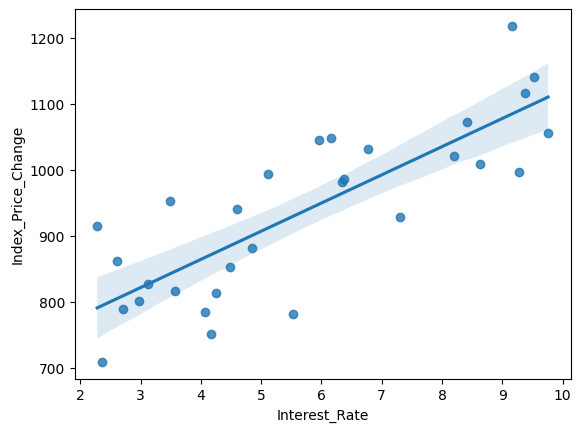

In [22]:
sns.regplot(x='Interest_Rate', y='Index_Price_Change', data=df)


<Axes: xlabel='Unemployment_Rate', ylabel='Index_Price_Change'>

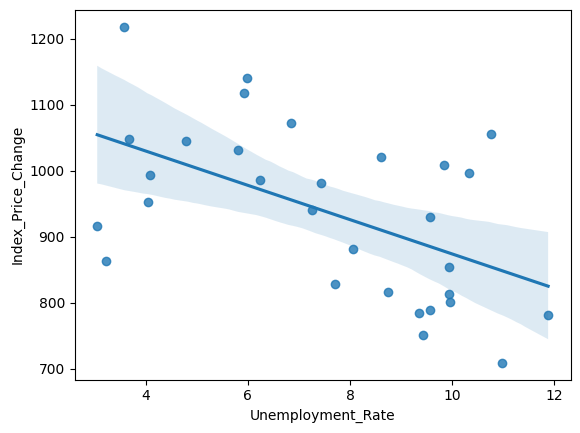

In [24]:
sns.regplot(x='Unemployment_Rate', y='Index_Price_Change', data=df)


In [25]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [30]:
X_train

array([[ 1.01713514,  0.33558416],
       [-0.05299848,  1.50923145],
       [ 1.44438998,  0.9565046 ],
       [ 1.48432034, -0.62630414],
       [-0.63198868,  0.60476932],
       [ 1.54421588, -0.60835846],
       [ 1.64004874,  1.11083742],
       [-0.59205832,  0.62630414],
       [-1.06722959,  0.81652831],
       [ 0.1226951 , -1.03546558],
       [-0.56011403,  0.81293918],
       [-1.3467421 , -1.65997514],
       [-0.21671295, -1.29029419],
       [ 0.27443047, -0.08434468],
       [-0.83164047,  0.38224292],
       [-1.21896495, -1.59537071],
       [-0.42035778, -0.15253826],
       [-0.46428117,  0.81293918],
       [-0.8675778 , -1.30465073],
       [ 1.40046658, -1.4733401 ],
       [-1.31479782,  1.18620926],
       [ 0.65776191,  0.67655203]])

In [31]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [32]:
regression.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
validatio=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [36]:
np.mean(validatio)


np.float64(-1405.0066970140554)

In [37]:
y_pred=regression.predict(X_test)
y_pred

array([ 765.29054094, 1034.87394323,  972.93022462,  668.85381945,
       1086.24274304,  996.0127138 , 1080.59009409,  842.99501174])

In [38]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))

MSE: 2849.3922918893936
R² Score: 0.719617115181632
Mean absolute error 39.613737176359024


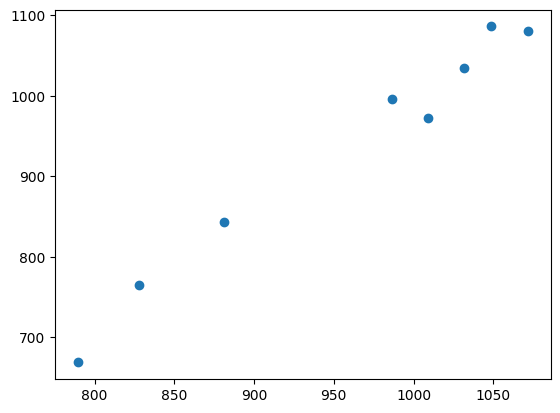

In [39]:
plt.scatter(y_test,y_pred)

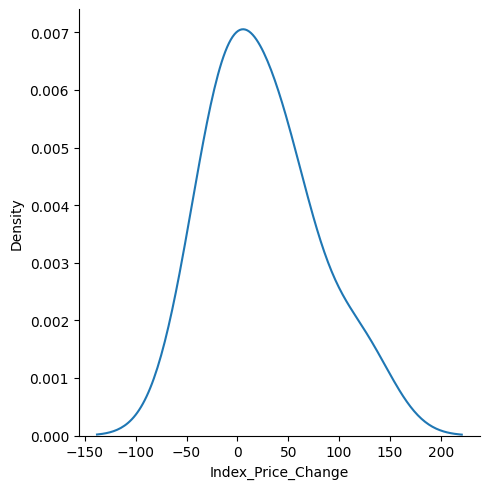

In [40]:
residual=y_test-y_pred
sns.displot(residual,kind='kde')

In [42]:
# Your new input (must match the feature order)
new_data = [[6.5, 5.2]]

# Scale the input using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Predict using the trained regression model
predicted_price_change = regression.predict(new_data_scaled)

print(predicted_price_change)

[1043.73530683]


e:\UDEMY\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
